In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [23]:
df = pd.read_csv("penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [24]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [12]:
# Count unique values in categorical columns
print(df['species'].value_counts())
print(df['island'].value_counts())
print(df['sex'].value_counts())

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64


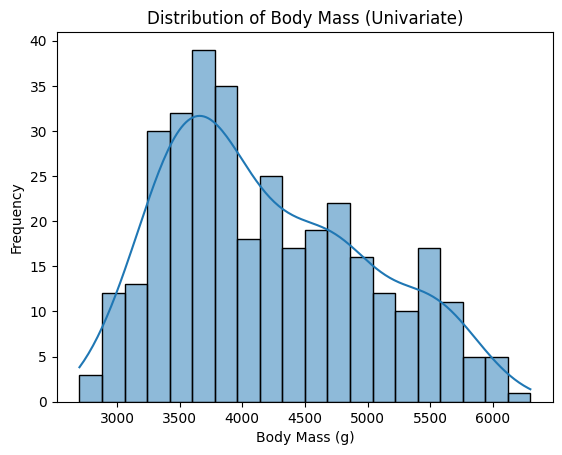

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate analysis of body mass
sns.histplot(data=df, x='body_mass_g', bins=20, kde=True)
plt.title('Distribution of Body Mass (Univariate)')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.show()

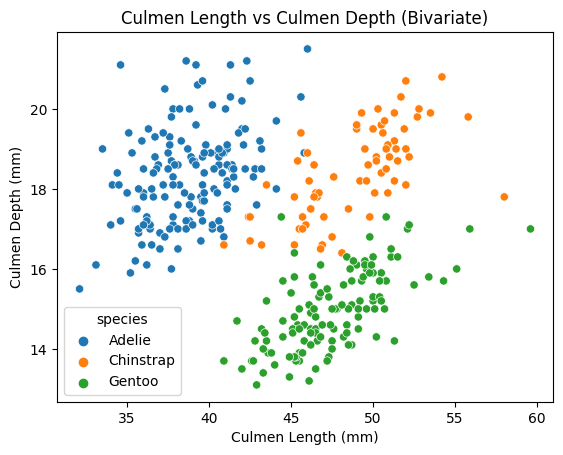

In [14]:
# Bivariate analysis of culmen length and culmen depth by species
sns.scatterplot(data=df, x='culmen_length_mm', y='culmen_depth_mm', hue='species')
plt.title('Culmen Length vs Culmen Depth (Bivariate)')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.show()


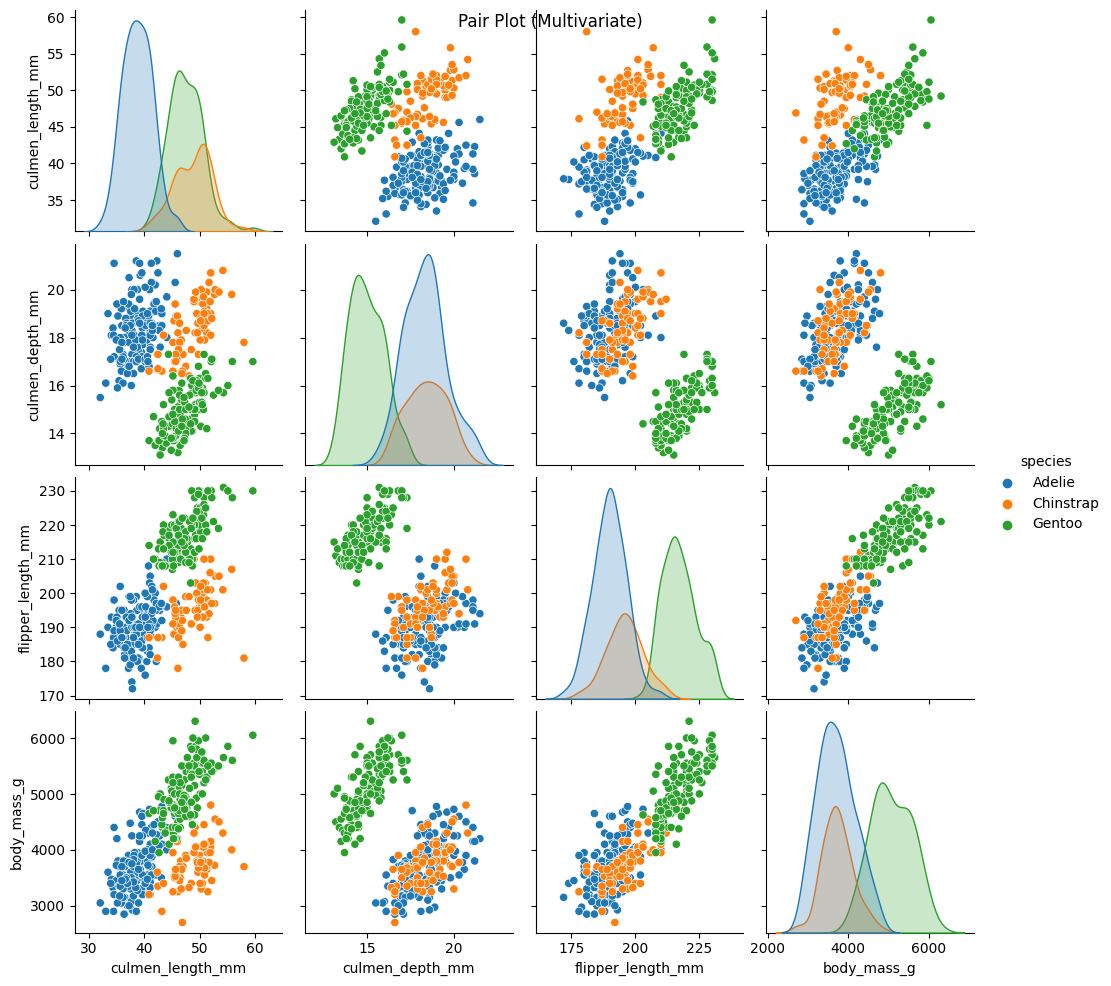

In [15]:
# Multivariate analysis using pair plot
sns.pairplot(df, hue='species')
plt.suptitle('Pair Plot (Multivariate)')
plt.show()


In [16]:
numeric_stats = df.describe()

# Generate descriptive statistics for categorical columns
categorical_stats = df.describe(include='object')

# Display the statistics
print("Numeric Statistics:")
print(numeric_stats)

print("\nCategorical Statistics:")
print(categorical_stats)

Numeric Statistics:
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000

Categorical Statistics:
       species  island   sex
count      344     344   334
unique       3       3     3
top     Adelie  Biscoe  MALE
freq       152     168   168


In [17]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values and their counts
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])

Columns with Missing Values:
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [19]:
df.dropna(inplace=True)

# Check for missing values again
missing_values = df.isnull().sum()
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])

Columns with Missing Values:
Series([], dtype: int64)


In [37]:
df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [39]:
from scipy import stats

columns = ['culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g']

for name in columns:
       column_name = name

# Calculate the Z-score for each data point
       z_scores = np.abs(stats.zscore(df[column_name]))

# Set a threshold for what you consider an outlier (e.g., Z-score > 3)
       threshold = 3

# Identify the indices of outliers
       outlier_indices = np.where(z_scores > threshold)

# Extract the rows containing outliers
       outliers = df.iloc[outlier_indices]

# Display the outliers
       print("Outliers:")
       print(outliers)
       print("==="*30)

Outliers:
Empty DataFrame
Columns: [species, island, culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
Outliers:
Empty DataFrame
Columns: [species, island, culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
Outliers:
Empty DataFrame
Columns: [species, island, culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
Outliers:
Empty DataFrame
Columns: [species, island, culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []


In [48]:
string_to_float_mapping = {
    'Chinstrap': 1.0,
    'Adelie': 2.0,
    'Gentoo': 3.0,
    # Add more mappings as needed
}

string_to_float_mapping2 = {
    'Dream': 1.0,
    'Torgersen': 2.0,
    'Biscoe': 3.0,
    # Add more mappings as needed
}

string_to_float_mapping3 = {
    'MALE': 1.0,
    'FEMALE': 2.0,
    # Add more mappings as needed
}

df['species'] = df['species'].map(string_to_float_mapping)
df['island'] = df['island'].map(string_to_float_mapping2)
df['sex'] = df['sex'].map(string_to_float_mapping3)

In [49]:
target_variable = 'sex'

# Calculate the correlation of each independent variable with the target
correlation_with_target = df.corr()[target_variable]

# Display the correlation values
print("Correlation of Independent Variables with the Target:")
print(correlation_with_target)

Correlation of Independent Variables with the Target:
species                   NaN
island                    NaN
culmen_length_mm    -0.344078
culmen_depth_mm     -0.372673
flipper_length_mm   -0.255169
body_mass_g         -0.424987
sex                  1.000000
Name: sex, dtype: float64


In [56]:
dff = pd.read_csv("penguins_size.csv")
print(dff.head())

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm   
0  Adelie  Torgersen              39.1             18.7              181.0  \
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


In [57]:
dff.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [58]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['species', 'island', 'sex']

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_columns:
    dff[column] = label_encoder.fit_transform(dff[column])

# Display the DataFrame with label encoding applied
print(dff)

     species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm   
0          0       2              39.1             18.7              181.0  \
1          0       2              39.5             17.4              186.0   
2          0       2              40.3             18.0              195.0   
3          0       2               NaN              NaN                NaN   
4          0       2              36.7             19.3              193.0   
..       ...     ...               ...              ...                ...   
339        2       0               NaN              NaN                NaN   
340        2       0              46.8             14.3              215.0   
341        2       0              50.4             15.7              222.0   
342        2       0              45.2             14.8              212.0   
343        2       0              49.9             16.1              213.0   

     body_mass_g  sex  
0         3750.0    2  
1         3800.

In [63]:
#CLEANING THE NEW DATASET

missing_values = dff.isnull().sum()

# Display columns with missing values and their counts
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])

dff.dropna(inplace=True)

# Check for missing values again
missing_values = dff.isnull().sum()
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])

Columns with Missing Values:
Series([], dtype: int64)
Columns with Missing Values:
Series([], dtype: int64)


In [64]:
#Split data into dependent and independent variables

target = 'sex' 

x = dff.drop(columns=[target])  # X contains all columns except 'body_mass_g'
y = dff[target]  # y contains the 'body_mass_g' column

# Display the independent variables (features)
print("Independent Variables (Features):")
print(x)

# Display the dependent variable (target)
print("\nDependent Variable (Target):")
print(y)

Independent Variables (Features):
     species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm   
0          0       2              39.1             18.7              181.0  \
1          0       2              39.5             17.4              186.0   
2          0       2              40.3             18.0              195.0   
4          0       2              36.7             19.3              193.0   
5          0       2              39.3             20.6              190.0   
..       ...     ...               ...              ...                ...   
338        2       0              47.2             13.7              214.0   
340        2       0              46.8             14.3              215.0   
341        2       0              50.4             15.7              222.0   
342        2       0              45.2             14.8              212.0   
343        2       0              49.9             16.1              213.0   

     body_mass_g  
0         

In [65]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the scaler on the independent variables (features)
x_scaled = scaler.fit_transform(x)

In [67]:
from sklearn.model_selection import train_test_split

# Splitting your data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

# X_train and y_train are your training data and labels
# X_test and y_test are your testing data and labels


In [68]:
print("Training Data Shape (X_train):", x_train.shape)
print("Training Data Shape (y_train):", y_train.shape)

# Check the shape of the testing data
print("Testing Data Shape (X_test):", x_test.shape)
print("Testing Data Shape (y_test):", y_test.shape)

Training Data Shape (X_train): (273, 6)
Training Data Shape (y_train): (273,)
Testing Data Shape (X_test): (69, 6)
Testing Data Shape (y_test): (69,)
